# Part II - (Presentation of key insights in the Analysis of San Francisco Bay bike-sharing 2019 data)
## by (Salaudeen Qudus)




## Investigation Overview


> The exploration of the San Francisco Bay bike-sharing 2019 shows many interesting information but I will be providing information on the two categories of users using the service and how they use it differently



## Dataset Overview

> > This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area which includes the station names, user type,duration of each rides and other related features 
> Check [this](https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv) for the dataset

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
#loading the data
ride_data_clean = pd.read_csv('ride_data_clean.csv')

#getting the first five observations

ride_data.head(10)

,Unnamed: 0,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,start_month,end_month,start_weekday,end_weekday,duration_min,duration_hr
0,0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,February,March,Thu,Fri,869,14
1,1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,The Embarcadero at Steuart St,37.791464,-122.391034,Berry St at 4th St,37.775880,-122.393170,2535,Customer,Other,No,February,March,Thu,Fri,708,11
2,2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,February,March,Thu,Fri,1030,17
3,3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,February,March,Thu,Fri,608,10
4,4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,February,March,Thu,Fri,26,0
5,5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,37.770407,-122.391198,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,Male,No,February,March,Thu,Fri,29,0
6,6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,Palm St at Willow St,37.317298,-121.884995,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,Female,No,February,March,Thu,Fri,19,0
7,7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,Washington St at Kearny St,37.795393,-122.404770,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,Male,No,February,March,Thu,Fri,26,0
8,8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,Washington St at Kearny St,37.795393,-122.404770,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,Other,No,February,March,Thu,Fri,26,0
9,9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,Post St at Kearny St,37.788975,-122.403452,Mission Playground,37.759210,-122.421339,6488,Subscriber,Male,No,February,March,Thu,Fri,17,0


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> There are two categories of users using the bike-sharing service,the subscribers and customers. Most of the users are subscribers(89.17% of the users are subscribers). How about checking the two categories of users uses the service differently on a daily basis?



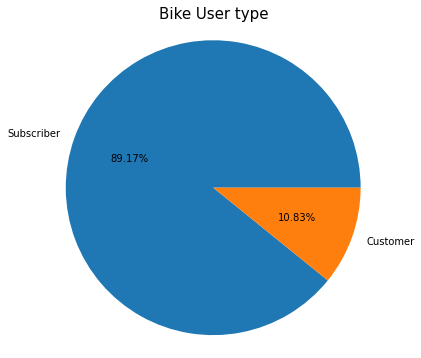

In [5]:
# Show user type by its percentage

plt.figure(figsize=(10,6))
sort_count = ride_data_clean['user_type'].value_counts()
plt.pie(sort_count, labels = sort_count.index, autopct='%0.2f%%');
plt.axis('square')
plt.title('Bike User type', fontsize=15);

## (Visualization 2)

> The distribution of the weekly usage of the service shows that most of the trips were on weekdays as the number of trips on weekends dropped significantly. However,since there are two categories of users,there is a need to check the usage of each

Text(0.5, 1.0, 'Distributions of trips by day')

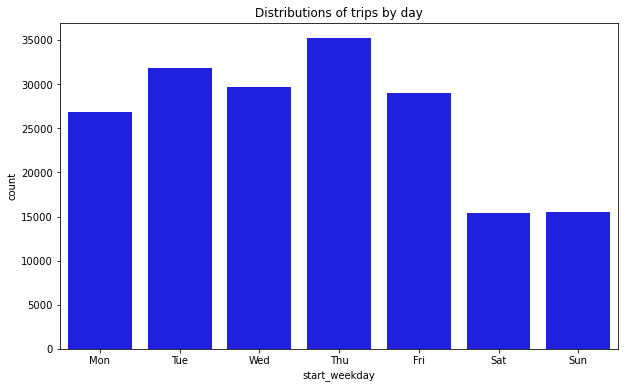

In [6]:
#countplot of start_weekday column
plt.figure(figsize=(10,6))
pl = sb.countplot(x=ride_data_clean['start_weekday'],order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],color='blue')
pl.set_title("Distributions of trips by day")

## (Visualization 3)
> While the number of bike-sharing for subscribers decrease drastically during weekends,there isn't significant difference in bike-sharing during weekdays and weekends among customers. We can deduce from the chart below that subscribers use the service more on weekdays. This best explains the point that there are more overall trips on weekdays than weekdays since there are more subscribers than customers. Let's explore the duration spent of trips by each users weekly


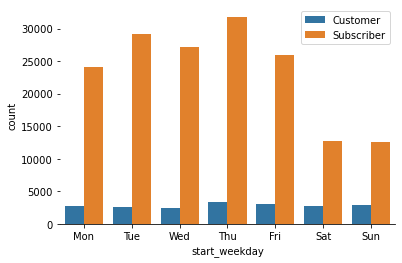

In [7]:
#countplot of start_weekday by user_type
tl = sb.countplot(x=ride_data_clean['start_weekday'],hue=ride_data_clean.user_type,
                 order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

#remove legend title
sb.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
plt.gca().legend().set_title('');

## Visualization 4
> It can be seen that Customers spend more time on the trips than subscribers and during weekends,the duration of trips increased significantly for customers. The duration of trips of subscribers is around 10mins with a slight increase on weekends. This indicate that subscribers seems to have a specific constant reason for usage of the bike-sharing system

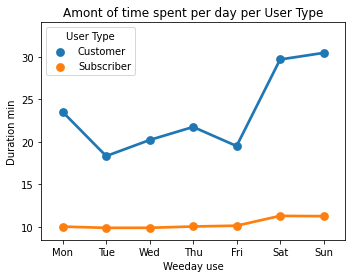

In [8]:
plt.figure(figsize=[12, 4])

# plot the point plot of month vs user type
plt.subplot(1, 2, 1)
sb.pointplot(data=ride_data_clean, x='start_weekday', y='duration_min', hue='user_type', 
             order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],errwidth=0)
plt.xlabel('Weeday use')
plt.ylabel('Duration min')
plt.title('Amont of time spent per day per User Type')
plt.legend(title='User Type')

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
